In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform                 

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': 
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [7]:
CCTV = pd.read_csv('CCTV_in_Seoul.csv', encoding = 'utf-8')
CCTV.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [9]:
Pop = pd.read_excel('population_in_Seoul.xls', header = 2, usecols = 'B ,D, G, J, N', encoding = 'utf-8')
Pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [10]:
Pop.rename(columns = {"자치구" : "구별", "계" : "인구수", "계.1" : "한국인", "계.2" : "외국인", "65세이상고령자" : "고령자" }, inplace = True)
Pop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [11]:
CCTV.rename(columns = {"기관명" : "구별", }, inplace = True)
CCTV.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [15]:
CCTV["최근증가율"] = (CCTV["2014년"] + CCTV["2015년"] + CCTV["2016년"]) / CCTV["2013년도 이전"] * 100
CCTV.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [16]:
CCPOP = pd.merge(CCTV, Pop, on = '구별')
CCPOP.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자
0,강남구,3238,1292,430,584,932,150.619195,547453,542364,5089,67085
1,강동구,1010,379,99,155,377,166.490765,431920,427573,4347,58770
2,강북구,831,369,120,138,204,125.203252,322915,319164,3751,58196
3,강서구,911,388,258,184,81,134.793814,603611,596949,6662,79660
4,관악구,2109,846,260,390,613,149.290780,520040,501957,18083,72249


In [18]:
del CCPOP["2013년도 이전"]
del CCPOP["2014년"]
del CCPOP["2015년"]
del CCPOP["2016년"]
CCPOP.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자
0,강남구,3238,150.619195,547453,542364,5089,67085
1,강동구,1010,166.490765,431920,427573,4347,58770
2,강북구,831,125.203252,322915,319164,3751,58196
3,강서구,911,134.793814,603611,596949,6662,79660
4,관악구,2109,149.290780,520040,501957,18083,72249


In [19]:
CCPOP["외국인비율"] = (CCPOP["외국인"] / CCPOP["인구수"] * 100)
CCPOP["고령자비율"] = (CCPOP["고령자"] / CCPOP["인구수"] * 100)
CCPOP.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1010,166.490765,431920,427573,4347,58770,1.006436,13.606686
2,강북구,831,125.203252,322915,319164,3751,58196,1.161606,18.022080
3,강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241
4,관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970


In [22]:
fp1 = np.polyfit(CCPOP["인구수"], CCPOP["소계"],1)

array([1.07336946e-03, 1.08384235e+03])

In [32]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

In [30]:
CCPOP["오차"] = np.abs(CCPOP["소계"] - f1(CCPOP["인구수"]))

In [31]:
CCPOP.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
0,강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020,1566.538319
1,강동구,1010,166.490765,431920,427573,4347,58770,1.006436,13.606686,537.452088
2,강북구,831,125.203252,322915,319164,3751,58196,1.161606,18.022080,599.449450
3,강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241,820.739963
4,관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970,466.962596


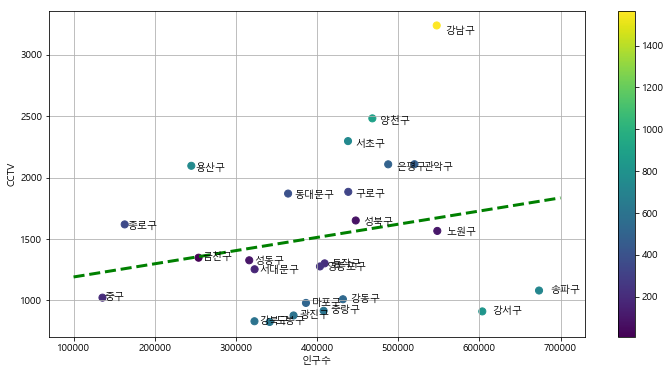

In [56]:
colormap = CCPOP["오차"]
Gu = CCPOP["구별"]
plt.figure(figsize = (12,6))
plt.scatter(CCPOP["인구수"], CCPOP["소계"], s = 50, c = colormap)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, c = "g")
for i in range(len(Gu)):
    plt.text(CCPOP["인구수"][i]*1.02, CCPOP["소계"][i]*0.98, Gu[i], fontsize = 10)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.colorbar()
plt.show()
#강남구는 회귀선보다 매우 높은 위치에 있는 것과 색이 노란색에 가까운것(오차가 큰 것)을 보면, 인구대비 CCTV가 굉장히 많다는 것을 알 수 있다.
#반대로 강서구나 송파구는 회귀선보다 매우 낮은 위치에 있는 것과 색이 초록색에 가까운 것(오차가 큰것)을 볼 때 인구대비 CCTV가 굉장히 적다는 것을 알 수 있다.
#색이 보라색에 가까울수록 오차가 적음